# Section A

Q1 Solution 1


=SUMIF(Table1[Region], "North",Table1[Sales])

The data is saved as a table named Table1. Values from Sales column is added only if Region has a value of 'North'

Q1 Solution 2

Create a table out of the data using ctrl+T.
Create a pivot table using the Insert tab in ribbon.
Drag the 'Regions' column in Rows field
         'Products' in Column field
         and 'Sales' in Values field.
Make sure the aggregation of values field is set to SUM

Q1 Solution 3

Using the filters of the table, select the non-blanks of Sales column.
Using the bottom ribbon, check the average value of the Sales column data.
Now keep only blanks selected in Sales col. Enter the average value as seen before.

Q2 Solution 1

In [1]:
import pandas as pd
data = {
 'Employee': ['A','B','C','D','E'],
 'Department': ['HR','Finance','Finance','HR','IT'],
 'Salary': [50000, 60000, None, 52000, 70000]
}
df = pd.DataFrame(data)
avgSal = df.groupby('Department')['Salary'].mean()                                  # avg salary in each dept
print(avgSal)

Department
Finance    60000.0
HR         51000.0
IT         70000.0
Name: Salary, dtype: float64


Q2 Solution 2

In [ ]:
import pandas as pd
data = {
 'Employee': ['A','B','C','D','E'],
 'Department': ['HR','Finance','Finance','HR','IT'],
 'Salary': [50000, 60000, None, 52000, 70000]
}
df = pd.DataFrame(data)
max_emp = df.loc[df['Salary'].idxmax()]                                             # Optimal solution
print(max_emp)
print(df['Employee'][df['Salary']==df['Salary'].max()])                             #  employee with the maximum salary 

Employee            E
Department         IT
Salary        70000.0
Name: 4, dtype: object
4    E
Name: Employee, dtype: object


Q2 Solution 3

Since the other values of dataset have low variance, the missing value can be imputed with departmental average. The department of Finance has 2 values, hence replacing with 0 is not better. Dropping the value is the last option as it leads to loss of data.

In [16]:
df['Salary'] = df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.mean()))               # Optimal solution
df

,Employee,Department,Salary
0,A,HR,50000.0
1,B,Finance,60000.0
2,C,Finance,60000.0
3,D,HR,52000.0
4,E,IT,70000.0


Q3 Solution 1

SELECT CustomerID, SUM(Amount) FROM Orders GROUP BY CustomerID

SELECT CustomerID, SUM(COALESCE(Amount,0)) AS total_revenue FROM Orders GROUP BY CustomerID;                                    # Optimal solution


Q3 Solution 2

SELECT CustomerID, SUM(Amount) as Total FROM Orders GROUP BY CustomerID ORDER BY Total DESC LIMIT 2

Q3 Solution 3

SQL result will not be affected because of Null values, hence it can be ignored. However filtering the results with a WHERE clause can be opted.

Q4 Solution 1

In [3]:
import numpy as np
temps = np.array([30, 32, 28, 31, 29, 35, 33])

avg = np.mean(temps)
medn = np.median(temps)
stdiv = np.std(temps)

print("Average", avg)
print("Median", medn)
print("Std Div", stdiv)

Average 31.142857142857142
Median 31.0
Std Div 2.2314999074019015


Q4 Solution 2

In [17]:
import numpy as np
temps = np.array([30, 32, 28, 31, 29, 35, 33])

avg = np.mean(temps)
medn = np.median(temps)
stdiv = np.std(temps)

print(temps[temps>np.mean(temps)])
count = len(temps[temps>np.mean(temps)])
print(count)

days_above_mean = np.sum(temps > avg)                           # optimal solution
print(days_above_mean)

[32 35 33]
3
3


Q4 Solution 3

Since NAN values affect the average, the np.nan_to_num(data, nan=value) function can be used to replace all nan fields with the value

In [18]:
# nan-safe functions
print(np.nanmean(temps))                                        # optimal solution
print(np.nanmedian(temps))
print(np.nanstd(temps))

31.142857142857142
31.0
2.2314999074019015


# Section B

Q5 Solution 1

From the data it is clear that product B shows consistent growth from Jan to Feb

Q5 Solution 2 - DAX: MoM_Growth = DIVIDE(SUM(Sales[Sales]) - CALCULATE(SUM(Sales[Sales]), PREVIOUSMONTH('Calendar'[Date])), CALCULATE(SUM(Sales[Sales]), PREVIOUSMONTH('Calendar'[Date])),0)

Explaination : numerator:(subtract current sum from previous month's sale sum) / denominator:total sales, alternate_val_if_Divby0

Q5 Solution 3

Q6 Solution 1


In [19]:
import pandas as pd

data = {
 'CustomerID': ['C1','C2','C3','C4'],
 'Tenure': [12,5,3,20],
 'MonthlyCharges': [1000,700,1200,800],
 'Churn':['Yes','No','Yes','No']
}
df = pd.DataFrame(data)

ch_yes = df['MonthlyCharges'][df["Churn"]=='Yes'].mean()
ch_no = df['MonthlyCharges'][df["Churn"]=='No'].mean()

print("average MonthlyCharges for churned customers ", ch_yes)
print("average MonthlyCharges for non-churned customers ", ch_no)
print(f'\n{df.groupby('Churn')['MonthlyCharges'].mean()}')                      # optimal solution

average MonthlyCharges for churned customers  1100.0
average MonthlyCharges for non-churned customers  750.0

Churn
No      750.0
Yes    1100.0
Name: MonthlyCharges, dtype: float64


Q6 Solution 2
From the above result we see that avg monthly charges of 1100 has caused churning of customers
and monthly avg charges of 750 has not caused churning out of customers
Hence we can conclude that, higher charges seem to increase churn 

Q6 Solution 3

In [20]:
import pandas as pd

data = {
 'CustomerID': ['C1','C2','C3','C4'],
 'Tenure': [12,5,3,20],
 'MonthlyCharges': [1000,700,1200,800],
 'Churn':['Yes','No','Yes','No']
}
df = pd.DataFrame(data)

ch_yes = df['Tenure'][df['Churn']=='Yes'].mean()
ch_no = df['Tenure'][df['Churn']=='No'].mean()

print("Avg tenure before churning out", ch_yes)                 # 7.5
print("Avg tenure of users who've not churned out yet", ch_no)  # 12.5

print(f'\n{df.groupby('Churn')['Tenure'].mean()}')

Avg tenure before churning out 7.5
Avg tenure of users who've not churned out yet 12.5

Churn
No     12.5
Yes     7.5
Name: Tenure, dtype: float64


From above result it is clear that tenure does not contribute to churn.

Q7 Solution 1
average spend per user per day.

 SELECT UserID, AVG(Amount) AS spend FROM Transactions GROUP BY UserID, Date

SELECT Date, SUM(Amount)/COUNT(DISTINCT UserID) AS avg_spend FROM Transactions GROUP BY Date;                   # optimal solution

Q7 Solution 2
day with the highest total spend.

 SELECT Date, SUM(Amount) AS highest_spend FROM Transactions GROUP BY Date ORDER BY highest_spend DESC

WITH daily AS ( SELECT Date, SUM(Amount) AS total FROM Transactions GROUP BY Date)  
SELECT Date FROM daily WHERE total = (SELECT MAX(total) FROM daily);    # optimal solution


Q7 Solution 3

 SELECT *, RANK() OVER(PARTITION BY Date ORDER BY highest_spend DESC) as rnk
 FROM (SELECT Date, SUM(Amount) AS highest_spend FROM Transactions GROUP BY Date) as sub WHERE rnk=1

Q8 Solution 1

 SELECT *, TIMEDIFF(Logout_Time, Login_Time) as HrsWorked FROM EmployeeLogData 


In [22]:
import pandas as pd
import numpy as np

data = {
    'Employee':['A','B','C'],
    'Login_Time':['09:00','10:00','09:30'],
    'Logout_Time':['17:00','16:00','18:00']
}
df = pd.DataFrame(data)

# np_login = np.datetime64(df['Login_Time'])
login = data['Login_Time']
pd_login = pd.to_datetime(login, format='mixed')
np_login = pd_login.to_numpy()

# np_logout = np.datetime64(df['Logout_Time'])
logout = data['Logout_Time']
pd_logout = pd.to_datetime(logout, format='mixed')
np_logout = pd_logout.to_numpy()

df['TotalHrsWorked'] = np_logout - np_login

# print(np_login)
# print(np_logout)
print(df)

  Employee Login_Time Logout_Time  TotalHrsWorked
0        A      09:00       17:00 0 days 08:00:00
1        B      10:00       16:00 0 days 06:00:00
2        C      09:30       18:00 0 days 08:30:00


In [23]:
df['Login'] = pd.to_datetime(df['Login_Time'], format='%H:%M')
df['Logout'] = pd.to_datetime(df['Logout_Time'], format='%H:%M')
df['Work_Hours'] = (df['Logout'] - df['Login']).dt.seconds/3600
df

,Employee,Login_Time,Logout_Time,TotalHrsWorked,Login,Logout,Work_Hours
0,A,09:00,17:00,0 days 08:00:00,1900-01-01 09:00:00,1900-01-01 17:00:00,8.0
1,B,10:00,16:00,0 days 06:00:00,1900-01-01 10:00:00,1900-01-01 16:00:00,6.0
2,C,09:30,18:00,0 days 08:30:00,1900-01-01 09:30:00,1900-01-01 18:00:00,8.5


Q8 Solution 2

SELECT *, RANK() OVER(PARTITION BY Employee ORDER BY HrsWorked DESC) as rnk 
FROM (SELECT *, TIMEDIFF(Logout_Time, Login_Time) as HrsWorked FROM EmployeeLogData ) as sub WHERE rnk=1

In [8]:
import pandas as pd
import numpy as np

data = {
    'Employee':['A','B','C'],
    'Login_Time':['09:00','10:00','09:30'],
    'Logout_Time':['17:00','16:00','18:00']
}
df = pd.DataFrame(data)

login = data['Login_Time']
pd_login = pd.to_datetime(login, format='mixed')
np_login = pd_login.to_numpy()

logout = data['Logout_Time']
pd_logout = pd.to_datetime(logout, format='mixed')
np_logout = pd_logout.to_numpy()

df['TotalHrsWorked'] = np_logout - np_login

sorted_df = df.sort_values(by='TotalHrsWorked', ascending=False)
print(df)

  Employee Login_Time Logout_Time  TotalHrsWorked
0        A      09:00       17:00 0 days 08:00:00
1        B      10:00       16:00 0 days 06:00:00
2        C      09:30       18:00 0 days 08:30:00


Q8 Solution 3

If the Logout column has blank values, then the median logout time can be calculated for that particular employee and the Null value can be replaced with it.

In [9]:
import pandas as pd
import numpy as np

data = {
    'Employee':['A','B','C'],
    'Login_Time':['09:00','10:00','09:30'],
    'Logout_Time':['17:00','16:00','18:00']
}
df = pd.DataFrame(data)

logout = data['Logout_Time']
pd_logout = pd.to_datetime(logout, format='mixed')
np_logout = pd_logout.to_numpy()

df['Logout_Time'] = np_logout

avg_logout_time = df.groupby('Employee')['Logout_Time'].median()            # calc median logout time for each emp
df['Logout_Time'].fillna(avg_logout_time)

print(df)


  Employee Login_Time         Logout_Time
0        A      09:00 2025-09-24 17:00:00
1        B      10:00 2025-09-24 16:00:00
2        C      09:30 2025-09-24 18:00:00


Q9 Solution 1
=[@Clicks]/[@Impressions]

Q9 Solution 2

['2025-01-01T00:00:00.000000000' '2025-01-01T00:00:00.000000000'
 '2025-01-02T00:00:00.000000000']


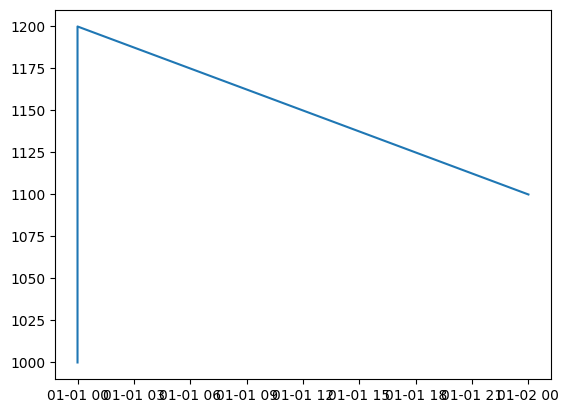

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Date':["1-Jan-2025", "1-Jan-2025", "2-Jan-2025"],
    'Campaign':['X','Y','X'],
    'Impressions':[1000,1200,1100]
}

df = pd.DataFrame(data)

dayt = data['Date']
camp = data['Campaign']
impresn = data['Impressions']

pd_date = pd.to_datetime(dayt, format = 'mixed')
np_date = pd_date.to_numpy()
print(np_date)

plt.plot(np_date, impresn)
plt.show()

Q9 Solution 3

If Impressions col has blank/null values, it should be filled with the average impressions per day value, to avoid CTR from giving error

In [11]:
import pandas as pd

data = {
    'Date':["1-Jan-2025", "1-Jan-2025", "2-Jan-2025"],
    'Campaign':['X','Y','X'],
    'Impressions':[1000,1200,1100]
}

df = pd.DataFrame(data)

dayt = data['Date']
camp = data['Campaign']
impresn = data['Impressions']

pd_date = pd.to_datetime(dayt, format = 'mixed')
np_date = pd_date.to_numpy()
print(np_date)

avg_imprn_per_day = df.groupby('Date')['Impressions'].mean()
df['Impressions'].fillna(avg_imprn_per_day)#, inplace=True)          # code to fill blank cells in Impression col


['2025-01-01T00:00:00.000000000' '2025-01-01T00:00:00.000000000'
 '2025-01-02T00:00:00.000000000']


0    1000
1    1200
2    1100
Name: Impressions, dtype: int64

# Section C
Q10 Solution

In [12]:
import numpy as np
import pandas as pd

storePerf = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Python\Notes\Python All Lecture Notes and Datasets\StorePerformance.csv')
ctDemog = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Python\Notes\Python All Lecture Notes and Datasets\CityDemographics.csv')

# print("Store Table\n",storePerf)
# print("\nCity Table\n", ctDemog)

sales_data = pd.merge(storePerf, ctDemog, on="City", how="outer")
print("\ncombined table\n", sales_data)
sales_data.to_csv("combined_sales_data.csv", index=False)

print()
raw_data = np.loadtxt(r"C:\Users\Lenovo\OneDrive\Documents\Python\CodingWise\Assesments\combined_sales_data.csv", dtype='str')
# sid, city, monthlysales, profitmargin, custff, populn, avgInc, compcnt = raw_data

print(raw_data)


combined table
   StoreID    City  MonthlySales  ProfitMargin  CustomerFootfall Population  \
0      S1   Delhi        200000          0.20             10000        20M   
1      S3  Indore        100000          0.25              6000         3M   
2      S2    Pune        150000          0.15              8000         8M   

   AvgIncome  CompetitorsCount  
0      35000                10  
1      25000                 2  
2      40000                 6  

['StoreID,City,MonthlySales,ProfitMargin,CustomerFootfall,Population,AvgIncome,CompetitorsCount'
 'S1,Delhi,200000,0.2,10000,20M,35000,10'
 'S3,Indore,100000,0.25,6000,3M,25000,2'
 'S2,Pune,150000,0.15,8000,8M,40000,6']
